<a href="https://colab.research.google.com/github/mohamedazeem33/mini-project/blob/main/final_vgg16(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [ ]:
# Set parameters
batch_size = 32
img_height = 150
img_width = 150

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Dataset directory (adjust based on your environment)
data_dir = '/content/drive/My Drive/archive_2'


In [ ]:
# Loading the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    validation_split=0.1,
    subset='training',
    seed=123,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    validation_split=0.1,
    subset='validation',
    seed=123,
    batch_size=batch_size
)

Found 700 files belonging to 2 classes.
Using 630 files for training.
Found 700 files belonging to 2 classes.
Using 70 files for validation.


In [ ]:
# Extract class names before normalizing the data
class_names = train_ds.class_names
label_to_class_name = dict(zip(range(len(class_names)), class_names))

In [ ]:
# Normalize the dataset (rescale the pixel values to [0, 1])
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

In [ ]:
# Load VGG16 without the top layer (used for transfer learning)
vgg16_base = VGG16(input_shape=(img_height, img_width, 3),
                   include_top=False,
                   weights='imagenet')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Freeze the layers of VGG16 so they are not trainable
for layer in vgg16_base.layers:
    layer.trainable = False

In [ ]:
# Create the model
model = models.Sequential([
    vgg16_base,  # Pre-trained VGG16 base
    layers.Flatten(),  # Flatten the feature maps
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Regularization
    layers.Dense(4, activation='softmax')  # Output layer for 4 classes
])

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
 4/20 ━━━━━━━━━━━━━━━━━━━━ 3:42 14s/step - accuracy: 1.0000 - loss: 1.6298e-08

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,862,350 (68.14 MB)

 Trainable params: 1,049,220 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2,098,442 (8.00 MB)

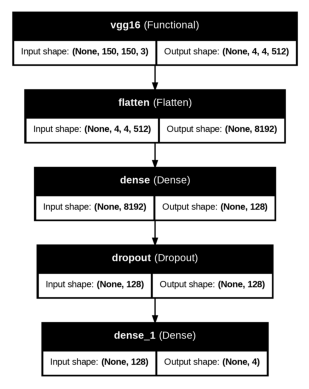

In [ ]:
from tensorflow.keras.utils import plot_model
# Print the model summary
model.summary()  # Print summary of the model architecture

# Plot model architecture and save the plot
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
# Load the image to display
img = cv2.imread('model_architecture.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


In [ ]:
# Print the final epoch's training and validation accuracy and loss
final_training_acc = history.history['accuracy'][-1]
final_training_loss = history.history['loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"\nFinal Training Accuracy: {final_training_acc:.4f}")
print(f"Final Training Loss: {final_training_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")


Final Training Accuracy: 1.0000
Final Training Loss: 0.0000
Final Validation Accuracy: 1.0000
Final Validation Loss: 0.0000


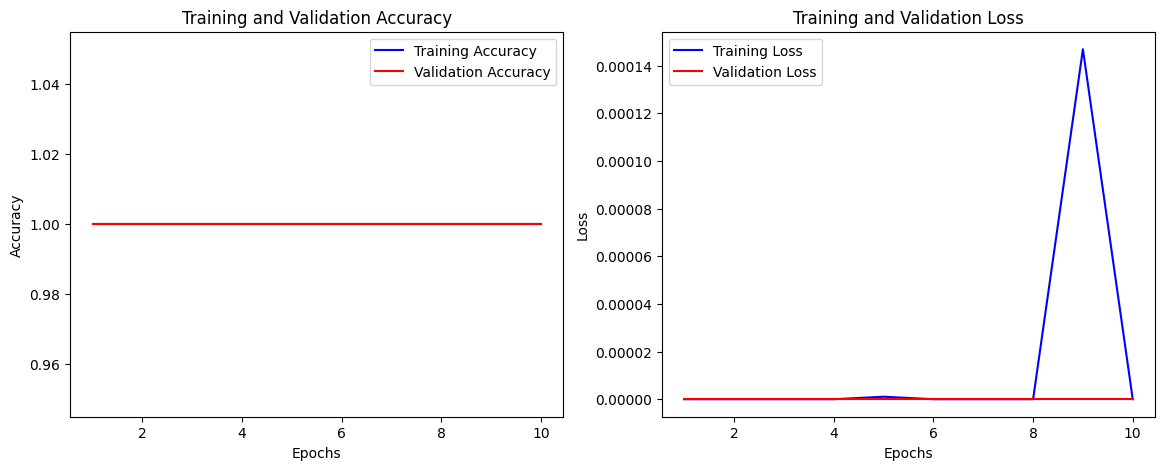

In [ ]:
# Plotting the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'b', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'b', label='Training Loss')
plt.plot(epochs_range, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Predict labels for validation set
y_pred = []
y_true = []
for images, labels in val_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
print("y_true unique values:", set(y_true))
print("y_pred unique values:", set(y_pred))
class_names = ["Class_1"]  # or name it according to your class label



y_true unique values: {1}
y_pred unique values: {1}


In [ ]:
# Classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
               precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        70

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


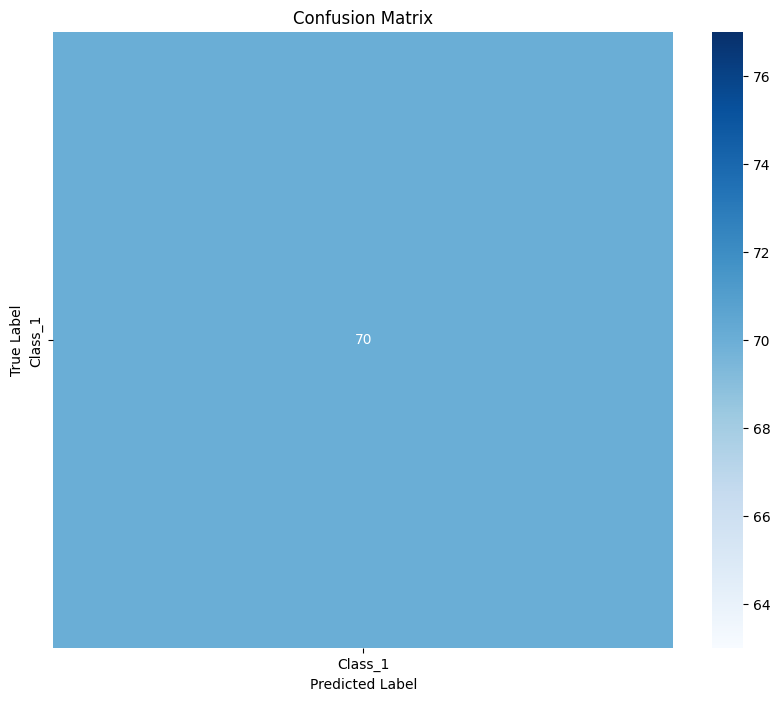

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Function to make predictions on an image
def predict_img(img):
    plt.imshow(img)
    plt.show()
    resize = tf.image.resize(img, (img_height, img_width))
    yhat = model.predict(np.expand_dims(resize / 255.0, 0))
    max_index = np.argmax(yhat)
    label = label_to_class_name[max_index]
    return label

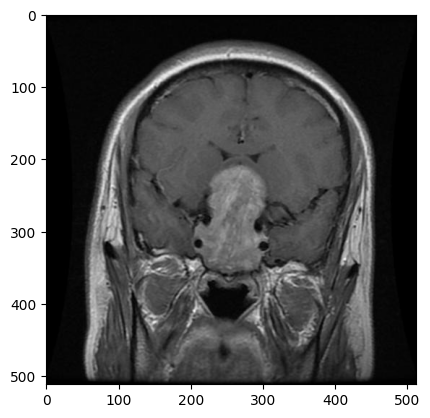

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
Predicted label: Training


In [ ]:
import cv2

# Load the image (adjust path if necessary)
img_path = '/content/drive/My Drive/archive_2/Training/pituitary/Tr-pi_0269.jpg'
img = cv2.imread(img_path)

# Check if the image was loaded successfully
if img is not None:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    predicted_label = predict_img(img_rgb)
    print(f"Predicted label: {predicted_label}")
else:
    print("Error: Image not found. Check the path and try again.")


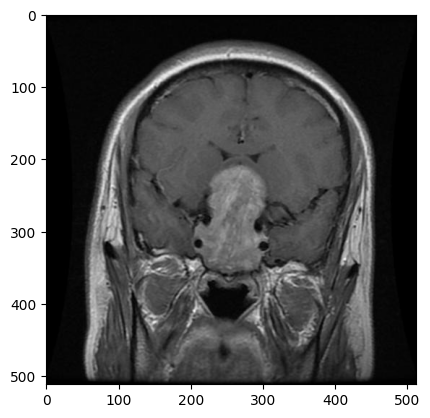

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
Predicted label: Training


In [ ]:
# Load a sample image for prediction
img = cv2.imread('/content/drive/My Drive/archive_2/Training/pituitary/Tr-pi_0269.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
predicted_label = predict_img(img_rgb)
print(f"Predicted label: {predicted_label}")

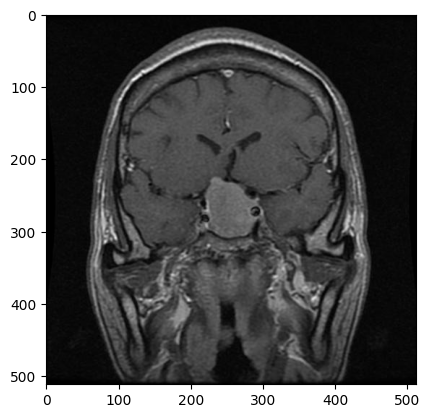

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
Predicted label: Training


In [ ]:
# Load a sample image for prediction
img = cv2.imread('/content/drive/My Drive/archive_2/Training/pituitary/Tr-pi_0279.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
predicted_label = predict_img(img_rgb)
print(f"Predicted label: {predicted_label}")

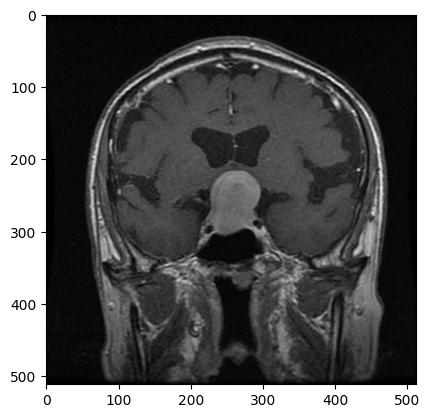

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
Predicted label: Training


In [ ]:
# Load a sample image for prediction
img = cv2.imread('/content/drive/My Drive/archive_2/Training/pituitary/Tr-pi_0289.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
predicted_label = predict_img(img_rgb)
print(f"Predicted label: {predicted_label}")

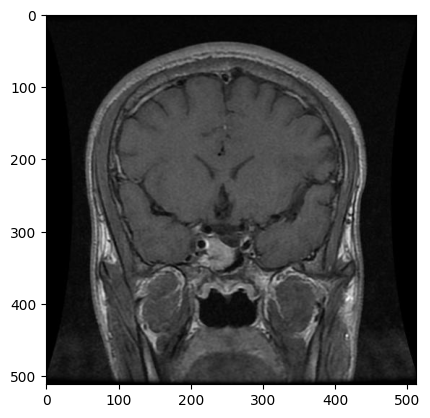

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
Predicted label: Training


In [ ]:
# Load a sample image for prediction
img = cv2.imread('/content/drive/My Drive/archive_2/Training/pituitary/Tr-pi_0313.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
predicted_label = predict_img(img_rgb)
print(f"Predicted label: {predicted_label}")